# KNN

In [404]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Split Data

In [405]:
def split_data(data, percentage):
    train, test = np.split(data.sample(frac=1.0, random_state=1), [int(percentage * len(data))])
    X_train = train.loc[: ,'s_length':'p_width']
    X_test = test.loc[: ,'s_length':'p_width']
    y_train = train['target']
    y_test = test['target']

    return X_train, X_test, y_train, y_test

## Calculate Euclidean Distance

In [406]:
def euclidean_distance(X_train, x):
    X = (X_train - x) ** 2
    return ((X.sum(axis=1)) ** (1/2))
     

## Predict Value For y_test

In [407]:
def predict(X_train, X_test, y_train, y_test, n):
    y_pred = []
    d = pd.DataFrame({'distance' : [], 'target' : []}) 
    
    for i in X_test.index:
        d['distance'] = euclidean_distance(X_train, X_test.loc[i])
        d['target'] = y_train
        d.sort_values(by='distance', inplace=True)
        c = pd.value_counts(d.iloc[0:n, 1])
        y_pred.append(c.idxmax())
    
    return np.array(y_pred)

## KNN Function

In [408]:
def knn(X_train, X_test, y_train, y_test, n):
    y_pred = predict(X_train, X_test, y_train, y_test, n)
    accuracy = ( len(y_pred[y_pred == y_test]) / len(y_test) ) * 100
    return accuracy


## Load Iris Data

In [409]:
iris = load_iris()
X = iris.data
y = iris.target

X = np.apply_along_axis(lambda c: (c - c.min()) / (c.max() - c.min()), 0, X)

data_set = np.hstack((X, y.reshape(len(y),1)))
data_set = pd.DataFrame(data_set, columns=['s_length', 's_width', 'p_length', 'p_width', 'target'])

## Plots b/w attributes of Iris

In [410]:
iris = sns.load_dataset('iris')
g = sns.PairGrid(iris, hue='species')
g.map(plt.scatter)
g.add_legend()

## Accuracy

In [411]:
X_train, X_test, y_train, y_test = split_data(data_set, 0.8)
k = range(1, 21) 
accuracy = []

for i in k:
    acc = knn(X_train, X_test, y_train, y_test, i)
    accuracy.append(acc)

print('Accuracy')
print(accuracy)

Accuracy
[93.33333333333333, 90.0, 90.0, 93.33333333333333, 96.66666666666667, 93.33333333333333, 90.0, 93.33333333333333, 96.66666666666667, 96.66666666666667, 93.33333333333333, 96.66666666666667, 96.66666666666667, 96.66666666666667, 96.66666666666667, 96.66666666666667, 93.33333333333333, 96.66666666666667, 93.33333333333333, 96.66666666666667]


## Plot k Vs Accuracy(in %)

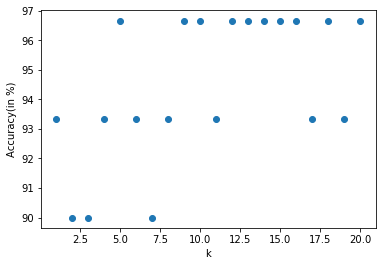

In [412]:
plt.scatter(k, accuracy)
plt.xlabel('k')
plt.ylabel('Accuracy(in %)')
plt.show()